In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
#handling here missing values in these 3 columns
df['Age'].fillna(df['Age'].median())
df['Embarked'].fillna(df['Embarked'].mode()[0])

#tried to drop these 2columns since it doesnt bring much of a diff while doing eda, but somehow shows error hence doing errors=ignore to ignore it
df.drop(['Ticket', 'Cabin'], axis=1, inplace=True, errors='ignore')

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


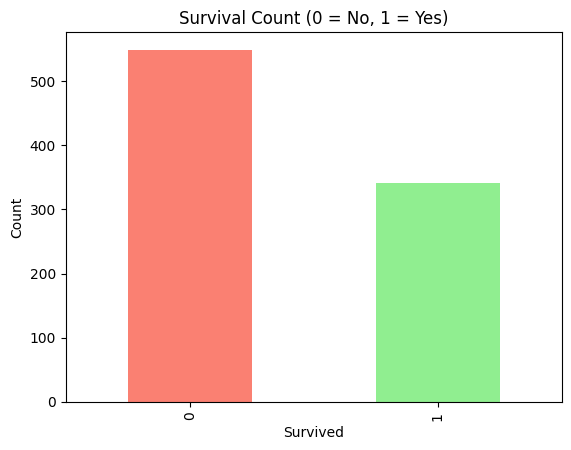

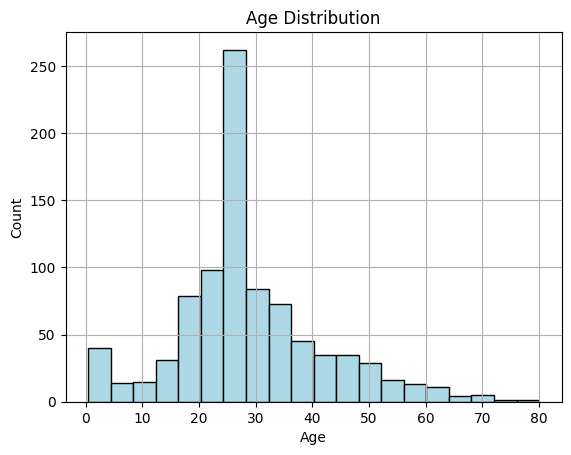

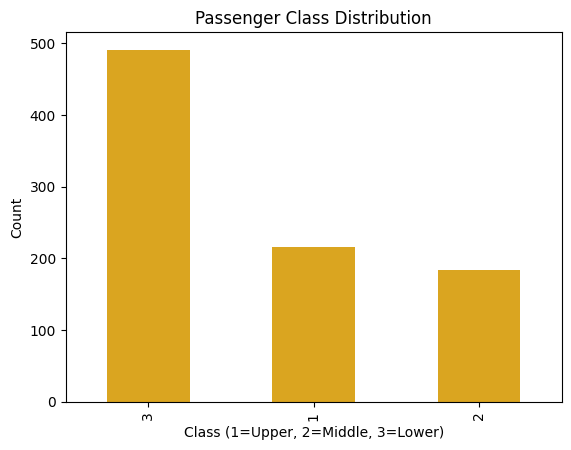

In [40]:
#Survival Count
df['Survived'].value_counts().plot(kind='bar', color=['salmon', 'lightgreen'])
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

#Age Distribution
df['Age'].hist(bins=20, color='lightblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

#Pclass Distribution
df['Pclass'].value_counts().plot(kind='bar', color='goldenrod')
plt.title("Passenger Class Distribution")
plt.xlabel("Class (1=Upper, 2=Middle, 3=Lower)")
plt.ylabel("Count")
plt.show()


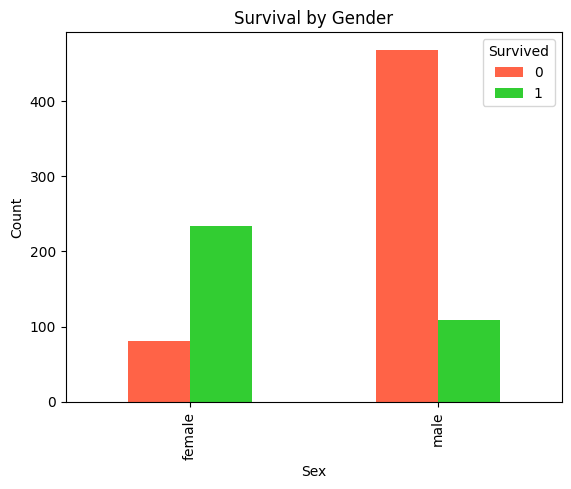

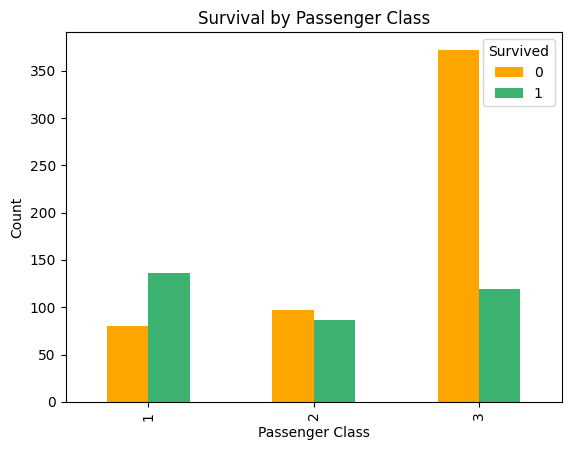

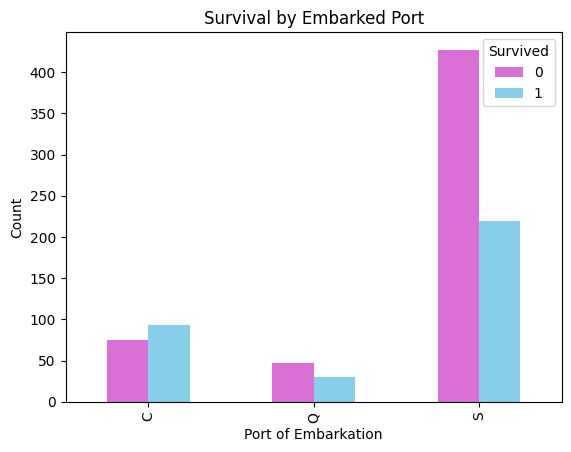

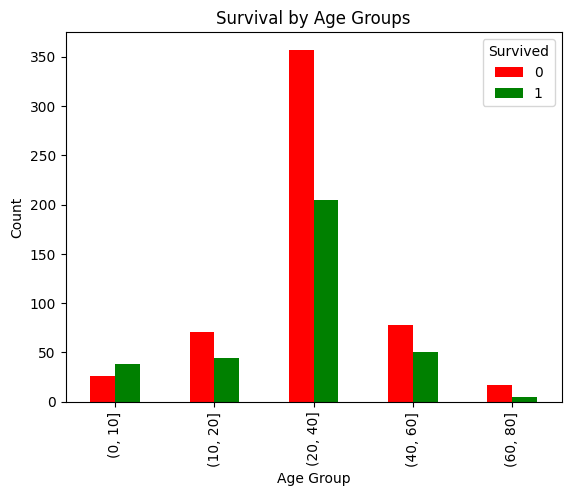

In [41]:
#btw, using colors which are not-that-bright to affect our eyes lolz
#Survival by Gender
pd.crosstab(df['Sex'], df['Survived']).plot(kind='bar', color=['tomato', 'limegreen'])
plt.title("Survival by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

#Survival by Passenger Class
pd.crosstab(df['Pclass'], df['Survived']).plot(kind='bar', color=['orange', 'mediumseagreen'])
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

#Survival by Embarked Port
pd.crosstab(df['Embarked'], df['Survived']).plot(kind='bar', color=['orchid', 'skyblue'])
plt.title("Survival by Embarked Port")
plt.xlabel("Port of Embarkation")
plt.ylabel("Count")
plt.show()

#Survival by Age Groups
age_bins = [0, 10, 20, 40, 60, 80]
pd.crosstab(pd.cut(df['Age'], bins=age_bins), df['Survived']).plot(kind='bar', color=['red', 'green'])
plt.title("Survival by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()


In [56]:
#checking othercolumns here on how they are correlating(incr-incr or incr-decr) with the 'survival'
df.corr(numeric_only=True)['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Pclass        -0.338481
Name: Survived, dtype: float64

In [57]:
#Observations...

print("""
Observations:
1️) Females had a much higher survival rate.
2️) 1st class passengers were more likely to survive.
3️) Children below 10 years also had better survival odds.
4️) Passengers who embarked from 'C' port had slightly higher survival rates.
""")


Observations:
1️) Females had a much higher survival rate.
2️) 1st class passengers were more likely to survive.
3️) Children below 10 years also had better survival odds.
4️) Passengers who embarked from 'C' port had slightly higher survival rates.



### Key Insights from Titanic EDA

- Around 38% of passengers survived.
- Female passengers had a much higher survival rate than males.
- Passengers in 1st class were more likely to survive.
- Younger passengers (especially under 10) had better survival odds.
- Most passengers boarded from Southampton.
- Higher fares were generally associated with higher survival chances.


In [58]:
df.to_csv("titanic_cleaned.csv", index=False)